In [90]:
import numpy as np
from scipy import stats

import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Updating Beta prior analitically

## Updating the ditribution

Code adapted from Osvaldo et al. (2022). [Bayesian Modeling and Computation in Python](https://bayesiancomputationbook.com/welcome.html)

In [11]:
viridish = [(0.2823529411764706, 0.11372549019607843, 0.43529411764705883, 1.0),
            (0.1450980392156863, 0.6705882352941176, 0.5098039215686274, 1.0),
            (0.6901960784313725, 0.8666666666666667, 0.1843137254901961, 1.0)]

In [38]:
def safe_zero_divide(a, b):
    if b == 0:
        return np.nan
    else:
        return a / b

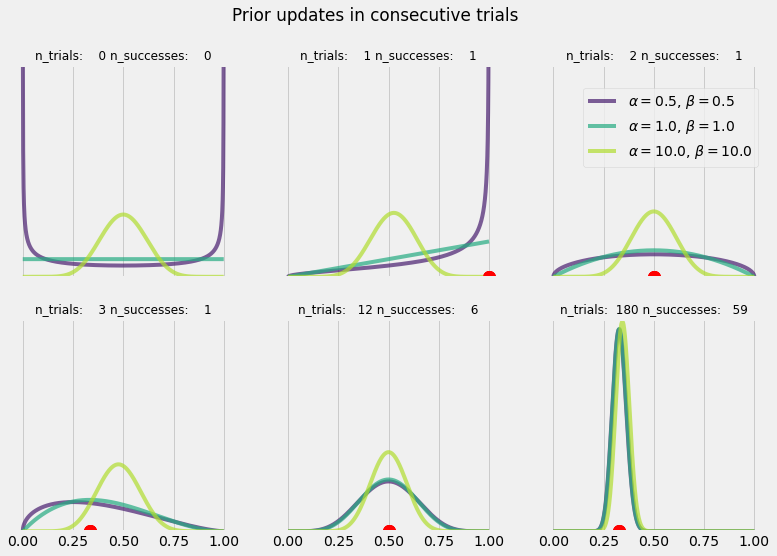

In [73]:
# Generate data
n_trials = [0, 1, 2, 3, 12, 180]
n_success = [0, 1, 1, 1, 6, 59]
data = zip(n_trials, n_success)

# Define  priors
beta_prior_params = [
    (.5, .5),
    (1., 1.),
    (10., 10.)]

# Define parameter space
theta = np.linspace(0, 1, 1500)

# Prepare plotting structure
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))
axes = np.ravel(axes)

# Iterate over data
for i, (n, y) in enumerate(data):
    
    # Iterate over Beta priors
    for j, (alpha_prior, beta_prior) in enumerate(beta_prior_params):
        
        # Compute posterior given prior and data
        p_theta_given_y = stats.beta(alpha_prior + y, beta_prior + n - y).pdf(theta)
        
        # Compute the point estimate
        point_estimate = safe_zero_divide(y, n)
        
        # Plot the posterior
        if i == len(n_trials) - 1:
            axes[i].plot(theta, p_theta_given_y, lw=4, color=viridish[j], 
                         label=f'$\\alpha={alpha_prior}$, $\\beta={beta_prior}$', alpha=.7)
        else:
            axes[i].plot(theta, p_theta_given_y, lw=4, color=viridish[j], alpha=.7)
            
        # Plot point estimate
        axes[i].plot(point_estimate, 0, color='red', marker='o', ms=12) 
            
        # Set ticks 
        axes[i].set_yticks([])
        axes[i].set_ylim(0, 12)
        
        # Add title
        axes[i].set_title(f'n_trials: {n:4d} n_successes: {y:4d}', fontsize=12)
        
fig.suptitle('Prior updates in consecutive trials')
fig.legend(loc=(.75, .7))
        
plt.show()

## Updating the mean 

The $Beta(\alpha, \beta)$ prior mean is:

$$\large \mathbb{E} [\theta] = \frac{\alpha}{\alpha + \beta}$$

The posterior mean is:

$$\large \mathbb{E} [\theta | Y] = \frac{\alpha + y}{\alpha + \beta + n}$$

where:

* $y$ is the number of succeses
* $n$ is the number of trials

In [168]:
def get_beta_posterior_mean(alpha_prior, beta_prior, n_trials, n_successes):
    return (alpha_prior + n_successes) / (alpha_prior + beta_prior + n_trials)

In [184]:
TRUE_MEAN = .75
SAMPLE_SIZE = 500

In [185]:
samples = stats.bernoulli(TRUE_MEAN).rvs(SAMPLE_SIZE)

In [186]:
means = {
    'beta_1': [get_beta_posterior_mean(1, 1, 0, 0)],
    'beta_10': [get_beta_posterior_mean(10, 10, 0, 0)],
    'beta_.5': [get_beta_posterior_mean(.5, .5, 0, 0)],
    'sampling_proportion': [np.nan]
}

n_successes_so_far = 0

for n, sample in enumerate(samples):
    
    # Update n_successes_so_far
    n_successes_so_far += sample
    
    # Update estimates
    means['beta_1'].append(get_beta_posterior_mean(1, 1, n+1, n_successes_so_far))
    means['beta_10'].append(get_beta_posterior_mean(10, 10, n+1, n_successes_so_far))
    means['beta_.5'].append(get_beta_posterior_mean(.5, .5, n+1, n_successes_so_far))
    means['sampling_proportion'].append(n_successes_so_far / (n+1))

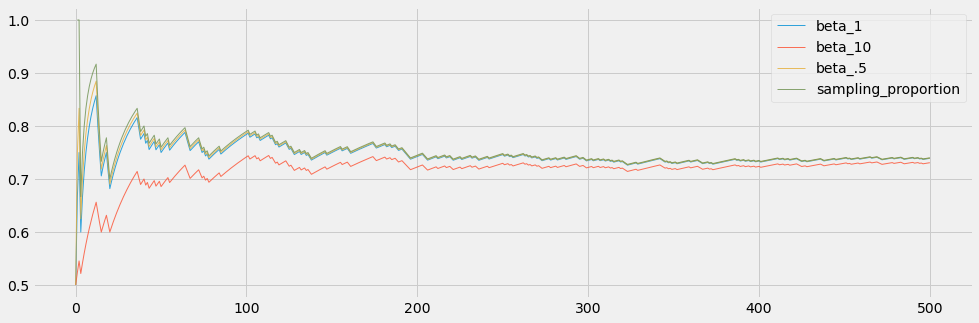

In [187]:
plt.figure(figsize=(15, 5))

for k in means.keys():
    plt.plot(means[k], label=k, alpha=.8, lw=1)
    
plt.legend()
plt.show()

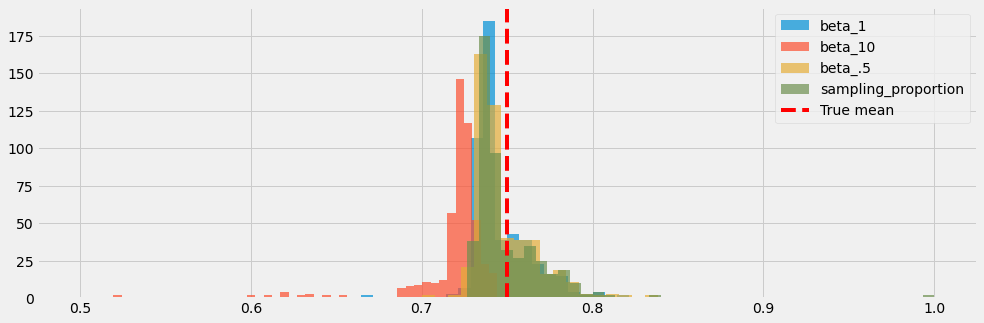

In [188]:
plt.figure(figsize=(15, 5))

for k in means.keys():
    plt.hist(means[k][0:], label=k, alpha=.7, bins=50)
    
plt.axvline(TRUE_MEAN, label='True mean', color='r', ls='--')
plt.legend()
plt.show()